In [86]:
# Implements Example 4.2 and Exercise 4.9 in Sutton/Barto ISBN 978-0262039246

# probability of a win or a loss
p_heads = 0.4
p_tails = 1 - p_heads

# discount
gamma = 1

# initial policy is always bet 0
policy = [0] * 101

# initial values are 0
V = [0] * 101

# returns available actions given the state (we can't bet more than we have)
def a(state: int):
    return range(1, min(state, 100 - state) + 1)

# returns the value of the state given a random uniform policy and updates V[s]
def v(state: int):
    # get all valid actions (bets) 
    valid_actions = a(state)
    p_action = 1/len(valid_actions)
    
    rewards = []
    for action in valid_actions:
        next_state_heads = state + action
        next_state_tails = state - action
        reward_heads = p_heads * ((1 if next_state_heads == 100 else 0) + gamma * V[next_state_heads])
        reward_tails = p_tails * (gamma * V[next_state_tails])
        rewards.append(p_action * (reward_heads + reward_tails))
    
    reward = sum(rewards)
    V[state] = V[state] + reward - V[state]
    return reward

# returns the value of the state given a max_a policy and updates V[s] and policy
def v_max_a(state: int):
    # get all valid actions (bets) 
    valid_actions = a(state)
    
    rewards = []
    for action in valid_actions:
        next_state_heads = state + action
        next_state_tails = state - action
        reward_heads = p_heads * ((1 if next_state_heads == 100 else 0) + gamma * V[next_state_heads])
        reward_tails = p_tails * (gamma * V[next_state_tails])
        rewards.append(reward_heads + reward_tails)
    
    max_index = max(enumerate(rewards), key=lambda x: x[1])[0]
    reward = rewards[max_index]
    V[state] = reward
    policy[state] = valid_actions[max_index]
    return reward

# for _ in range(2):
#     for s in range(1, 100):
#         print(f'r{s} = {v(s)}')

def has_converged(old_V, new_V, threshold=1e-8):
    return all(abs(old_V[state] - new_V[state]) < threshold for state in range(len(V)))

converged = False
while not converged:
    old_V = V.copy()
    for s in range(1, 100):
        v_max_a(s)
    converged = has_converged(V, old_V)
        
# print out our policy
for i, a in enumerate(policy):
    print(f'action at {i} = {a}')

action at 0 = 0
action at 1 = 1
action at 2 = 2
action at 3 = 3
action at 4 = 4
action at 5 = 5
action at 6 = 6
action at 7 = 7
action at 8 = 8
action at 9 = 9
action at 10 = 10
action at 11 = 11
action at 12 = 12
action at 13 = 12
action at 14 = 11
action at 15 = 10
action at 16 = 16
action at 17 = 8
action at 18 = 7
action at 19 = 6
action at 20 = 5
action at 21 = 4
action at 22 = 3
action at 23 = 2
action at 24 = 1
action at 25 = 25
action at 26 = 1
action at 27 = 2
action at 28 = 3
action at 29 = 4
action at 30 = 5
action at 31 = 6
action at 32 = 7
action at 33 = 17
action at 34 = 9
action at 35 = 10
action at 36 = 11
action at 37 = 12
action at 38 = 12
action at 39 = 11
action at 40 = 10
action at 41 = 9
action at 42 = 8
action at 43 = 7
action at 44 = 6
action at 45 = 5
action at 46 = 4
action at 47 = 3
action at 48 = 2
action at 49 = 1
action at 50 = 50
action at 51 = 1
action at 52 = 2
action at 53 = 3
action at 54 = 4
action at 55 = 5
action at 56 = 6
action at 57 = 43
action 

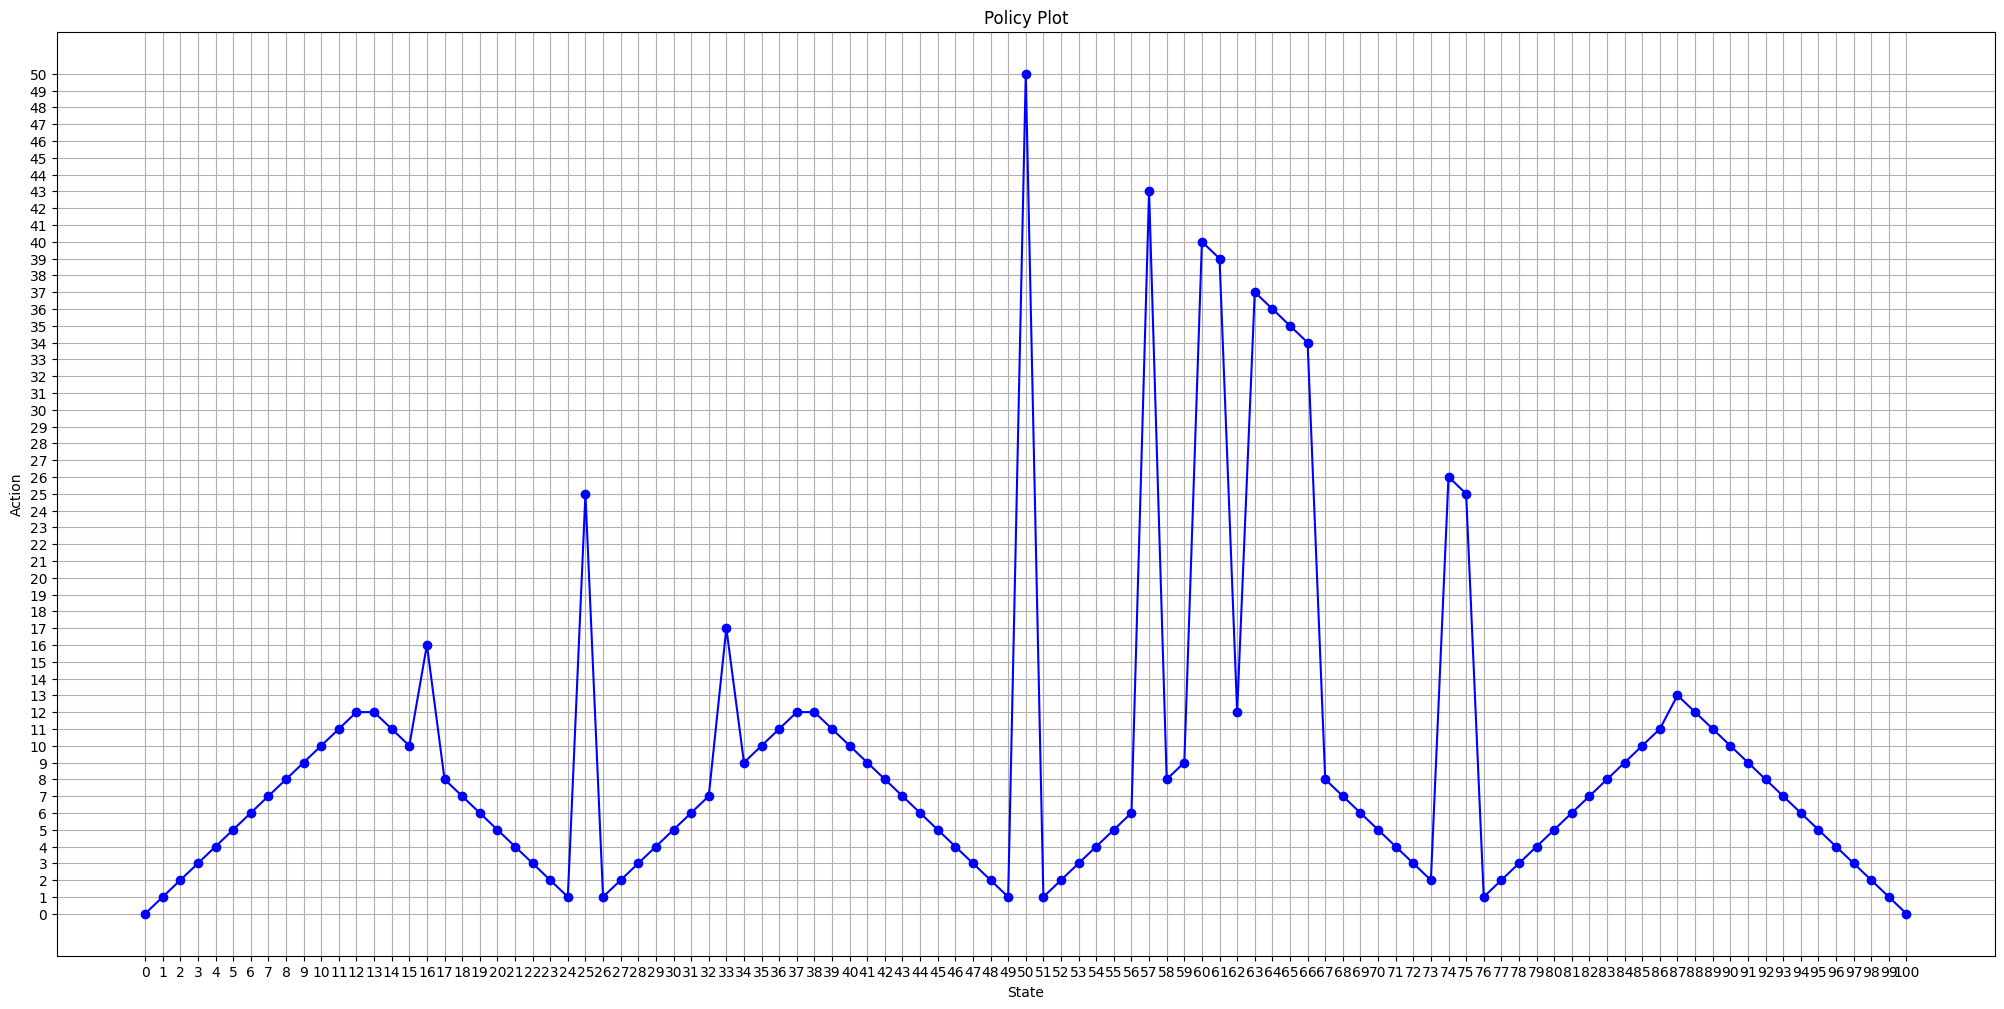

In [87]:
import matplotlib.pyplot as plt

def plot_policy(policy):
    states = range(len(policy))
    actions = policy

    plt.figure(figsize=(25, 12))
    plt.plot(states, actions, marker='o', linestyle='-', color='b')
    plt.title('Policy Plot')
    plt.xlabel('State')
    plt.ylabel('Action')
    plt.grid(True)
    plt.xticks(states)
    plt.yticks(range(max(actions) + 1))
    plt.show()

# Plot the policy
plot_policy(policy)